In [5]:
#Importação das bibliotecas __________________________________________________________________________________________________
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#  imoportação das bases via link do google drive ___________________________________________________________________________
file_id_med = '1tu0E4Xqt7FeprldGQYI4uypcncIOwDHl' 
url_med = f'https://drive.google.com/uc?export=download&id={file_id_med}'

file_id_paci = '1d-ZZjoFHCRym5tGei5cE05974uzPIuQT' 
url_paci = f'https://drive.google.com/uc?export=download&id={file_id_paci}'

file_id_cli = '14w0KYUbEJicByKS7M3upVvWzXKLH8kzQ' 
url_cli = f'https://drive.google.com/uc?export=download&id={file_id_cli}'

file_id_consul = '12bPlpo8oiaEOIuwQni1lKzc6fWKm7QfI' 
url_consul = f'https://drive.google.com/uc?export=download&id={file_id_consul}'

file_id_avali = '1X5cWJUBa712NGzpR5THEU1T4xlEozfoh' 
url_avali = f'https://drive.google.com/uc?export=download&id={file_id_avali}'

In [7]:
#importando todas as bases _________________________________________________________________________________________________
df_med = pd.read_csv (url_med,sep=';', encoding='utf-8')
df_paci = pd.read_csv (url_paci,sep=',', encoding='utf-8')
df_cli = pd.read_csv (url_cli,sep=',', encoding='utf-8')
df_consul = pd.read_csv (url_consul,sep=',', encoding='utf-8')
df_avali = pd.read_csv (url_avali,sep=',', encoding='utf-8')

In [9]:
# Filtra somente as consultas realizadas ___________________________________________________________________________________
df_realizadas= df_consul.loc[df_consul['status'] == 'Realizada']

In [10]:
# Converte para datetime ___________________________________________________________________________________________________
df_realizadas["data_hora_agendada"] = pd.to_datetime(df_realizadas["data_hora_agendada"], errors="coerce", dayfirst=True)  
df_realizadas["data_hora_inicio"] = pd.to_datetime(df_realizadas["data_hora_inicio"], errors="coerce", dayfirst=True) 

# Criar uma coluna para tempo de espera e fazer o calculo da espera em minuto _______________________________________________
df_realizadas['tempo_espera_min'] = ((df_realizadas['data_hora_inicio'] - df_realizadas['data_hora_agendada']).dt.total_seconds() / 60)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_15212\130570820.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_realizadas["data_hora_agendada"] = pd.to_datetime(df_realizadas["data_hora_agendada"], errors="coerce", dayfirst=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_15212\130570820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_realizadas["data_hora_agendada"] = pd.to_datetime(df_realizadas["data_hora_agendada"], errors="coerce", dayfirst=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_15212\130570820.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False`

In [11]:
# Média e mediana por especialidade  _______________________________________________________________________________________

# Cardiologia 
# Filtra somente cardiologia
df_cardio= df_realizadas.loc[df_consul['especialidade'] == 'Cardiologia']

#array
array_cardio= df_cardio['tempo_espera_min']
dados_cardio= np.array(array_cardio)

#média, mediana e distância
media_cardio= np.mean(dados_cardio)
mediana_cardio= np.median(dados_cardio)
distancia_cardio= (media_cardio - mediana_cardio) / mediana_cardio *100

#quartil
q1_cardio= np.percentile(dados_cardio, 25)
q2_cardio= np.percentile(dados_cardio, 50)
q3_cardio= np.percentile(dados_cardio, 75)

#Intervalo de interquartil
IQR= q3_cardio - q1_cardio

#limite superior e inferior
ls_cardio= q3_cardio + (1.5 * IQR)
li_cardio= q1_cardio - (1.5 * IQR)

In [12]:
# Dermatologia 
# Filtra somente dermatologia
df_dermatologia= df_realizadas.loc[df_consul['especialidade'] == 'Dermatologia']

#array
array_dermatologia= df_dermatologia['tempo_espera_min']
dados_dermatologia= np.array(array_dermatologia)

#média, mediana e distância
media_dermatologia= np.mean(dados_dermatologia)
mediana_dermatologia= np.median(dados_dermatologia)
distancia_dermatologia= (media_dermatologia - mediana_dermatologia) / mediana_dermatologia *100

#quartil
q1_dermatologia= np.percentile(dados_dermatologia, 25)
q2_dermatologia= np.percentile(dados_dermatologia, 50)
q3_dermatologia= np.percentile(dados_dermatologia, 75)

#Intervalo de interquartil
IQR= q3_dermatologia - q1_dermatologia

#limite superior e inferior
ls_dermatologia= q3_dermatologia + (1.5 * IQR)
li_dermatologia= q1_dermatologia - (1.5 * IQR)


In [13]:
# Ginecologia 
# Filtra somente ginecologia
df_ginecologia= df_realizadas.loc[df_consul['especialidade'] == 'Ginecologia']

#array
array_ginecologia= df_ginecologia['tempo_espera_min']
dados_ginecologia= np.array(array_ginecologia)

#média, mediana e distância
media_ginecologia= np.mean(dados_ginecologia)
mediana_ginecologia= np.median(dados_ginecologia)
distancia_ginecologia= (media_ginecologia - mediana_ginecologia) / mediana_ginecologia *100

#quartil
q1_ginecologia= np.percentile(dados_ginecologia, 25)
q2_ginecologia= np.percentile(dados_ginecologia, 50)
q3_ginecologia= np.percentile(dados_ginecologia, 75)

#Intervalo de interquartil
IQR= q3_ginecologia - q1_ginecologia

#limite superior e inferior
ls_ginecologia= q3_ginecologia + (1.5 * IQR)
li_ginecologia= q1_ginecologia - (1.5 * IQR)

In [14]:
# Neurologia 
# Filtra somente neurologia
df_neurologia= df_realizadas.loc[df_consul['especialidade'] == 'Neurologia']

#array
array_neurologia= df_neurologia['tempo_espera_min']
dados_neurologia= np.array(array_neurologia)

#média, mediana e distância
media_neurologia= np.mean(dados_neurologia)
mediana_neurologia= np.median(dados_neurologia)
distancia_neurologia= (media_neurologia - mediana_neurologia) / mediana_neurologia *100

#quartil
q1_neurologia= np.percentile(dados_neurologia, 25)
q2_neurologia= np.percentile(dados_neurologia, 50)
q3_neurologia= np.percentile(dados_neurologia, 75)

#Intervalo de interquartil
IQR= q3_neurologia - q1_neurologia

#limite superior e inferior
ls_neurologia= q3_neurologia + (1.5 * IQR)
li_neurologia= q1_neurologia - (1.5 * IQR)

In [15]:
# Ortopedia 
# Filtra somente ortopedia
df_ortopedia= df_realizadas.loc[df_consul['especialidade'] == 'Ortopedia']

#array
array_ortopedia= df_ortopedia['tempo_espera_min']
dados_ortopedia= np.array(array_ortopedia)

#média, mediana e distância
media_ortopedia= np.mean(dados_ortopedia)
mediana_ortopedia= np.median(dados_ortopedia)
distancia_ortopedia= (media_ortopedia - mediana_ortopedia) / mediana_ortopedia *100

#quartil
q1_ortopedia= np.percentile(dados_ortopedia, 25)
q2_ortopedia= np.percentile(dados_ortopedia, 50)
q3_ortopedia= np.percentile(dados_ortopedia, 75)

#Intervalo de interquartil
IQR= q3_ortopedia - q1_ortopedia

#limite superior e inferior
ls_ortopedia= q3_ortopedia + (1.5 * IQR)
li_ortopedia= q1_ortopedia - (1.5 * IQR)

In [16]:
# Pediatria 
# Filtra somente pediatria
df_pediatria= df_realizadas.loc[df_consul['especialidade'] == 'Pediatria']

#array
array_pediatria= df_pediatria['tempo_espera_min']
dados_pediatria= np.array(array_pediatria)

#média, mediana e distância
media_pediatria= np.mean(dados_pediatria)
mediana_pediatria= np.median(dados_pediatria)
distancia_pediatria= (media_pediatria - mediana_pediatria) / mediana_pediatria *100

#quartil
q1_pediatria= np.percentile(dados_pediatria, 25)
q2_pediatria= np.percentile(dados_pediatria, 50)
q3_pediatria= np.percentile(dados_pediatria, 75)

#Intervalo de interquartil
IQR= q3_pediatria - q1_pediatria

#limite superior e inferior
ls_pediatria= q3_pediatria + (1.5 * IQR)
li_pediatria= q1_pediatria - (1.5 * IQR)

In [17]:
# Média e mediana por medico  _______________________________________________________________________________________
# Pd merge para juntar o df de medico e de tempo
df_med_merge = pd.merge(df_med, df_realizadas, on='id_medico', how='inner')

In [18]:
# Média, mediana e distância
df_med_media = df_med_merge.groupby('nome')['tempo_espera_min'].mean().round(1).reset_index()
df_med_mediana= df_med_merge.groupby('nome')['tempo_espera_min'].median().reset_index()
# Junta média e mediana em um df para criar uma tabela com media, mediana e distancia
df_distancia = pd.merge(df_med_media, df_med_mediana, on='nome', suffixes=('_media', '_mediana')) #suffixer para renomear as colunas
df_distancia['distancia'] = (df_distancia['tempo_espera_min_media'] - df_distancia['tempo_espera_min_mediana']).abs().round(2) #abs para trazer valor absoluto


In [19]:
# Função para mostrar os dados do médico
def buscar_medico(nome):
    resultado = df_distancia.loc[df_distancia['nome'] == nome ]
    print(resultado)

buscar_medico("Dr(a). Ricardo Souza") #medico usado como exemplo

                    nome  tempo_espera_min_media  tempo_espera_min_mediana  \
58  Dr(a). Ricardo Souza                    73.1                      30.0   

    distancia  
58       43.1  


In [28]:
#outliers do medico, consertar amanha
def buscar_outliers_medico(nome):
    # Filtra os dados do médico
    df_filtro_unitario = df_med_merge.loc[df_med_merge['nome'] == nome]

    if df_filtro_unitario.empty:
        print(f"Médico '{nome}' não encontrado.")
        return
    else: 
        print(f"Médico '{nome}' encontrado.")

    # criando o array
    dados_med= np.array(df_filtro_unitario['tempo_espera_min'])

    # Calcula Q1, Q3 e IQR
    q1 = np.percentile(dados_med, 25)
    q3 = np.percentile(dados_med,75)
    iqr = q3 - q1

    limite_inferior = q1 - (1.5 * iqr)
    limite_superior = q3 + (1.5 * iqr)

    # Filtra as linhas que são outliers
    outliers = df_filtro_unitario[(df_filtro_unitario['tempo_espera_min'] < limite_inferior) |(df_filtro_unitario['tempo_espera_min'] > limite_superior)]

    # Retorna os resultados
    if outliers.empty:
        print(f"Nenhum outlier encontrado para o médico '{nome}'.")
    else:
        print(f"Outliers encontrados para o médico '{nome}':")
        print(outliers.to_string(index=False))

In [29]:
buscar_outliers_medico("Dr(a). Ricardo Souza")


Médico 'Dr(a). Ricardo Souza' encontrado.
Outliers encontrados para o médico 'Dr(a). Ricardo Souza':
 id_medico                 nome especialidade_x  id_consulta  id_paciente  id_clinica especialidade_y  data_hora_agendada    data_hora_inicio    status  tempo_espera_min
         2 Dr(a). Ricardo Souza       Pediatria         1273           33          95       Pediatria 2023-02-10 14:44:00 2023-02-10 19:44:00 Realizada             300.0
         2 Dr(a). Ricardo Souza       Pediatria         4825           15          83       Pediatria 2023-12-08 02:22:00 2023-12-08 07:22:00 Realizada             300.0


In [31]:
# Média e mediana por clínica _______________________________________________________________________________________
# Pd merge para juntar o df de medico e de tempo
df_cli_merge = pd.merge(df_cli, df_realizadas, on='id_clinica', how='inner')

# Média, mediana e distância
df_cli_media = df_cli_merge.groupby('nome')['tempo_espera_min'].mean().round(1).reset_index()
df_cli_mediana= df_cli_merge.groupby('nome')['tempo_espera_min'].median().reset_index()
# Junta média e mediana em um df para criar uma tabela com media, mediana e distancia
df_distancia_cli= pd.merge(df_cli_media, df_cli_mediana, on='nome', suffixes=('_media', '_mediana')) #suffixer para renomear as colunas
df_distancia_cli['distancia'] = (df_distancia_cli['tempo_espera_min_media'] - df_distancia_cli['tempo_espera_min_mediana']).abs().round(2) #abs para trazer valor absoluto

In [ ]:
# Função para mostrar os dados da clínica
def buscar_clinica(nome):
    resultado = df_distancia_cli.loc[df_distancia_cli['nome'] == nome ]
    print(resultado)


In [37]:
#Função para mostrar os outliers da clinica
def buscar_outliers_clinica(nome):

    # Filtra os dados da clinica
    df_filtro_unitario = df_cli_merge[df_cli_merge['nome'] == nome]

    if df_filtro_unitario.empty:
        print(f"Médico '{nome}' não encontrado.")
        return
    
    # criando o array
    dados_clinica= np.array(df_filtro_unitario['tempo_espera_min'])

    # Q1, Q3 e IQR
    q1 = np.percentile(dados_clinica,25) 
    q3 = np.percentile(dados_clinica,75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Filtra as linhas que são outliers
    outliers = df_filtro_unitario[(df_filtro_unitario['tempo_espera_min'] < limite_inferior) |(df_filtro_unitario['tempo_espera_min'] > limite_superior)]

    # resultado
    if outliers.empty:
        print(f"Nenhum outlier encontrado para a clinica '{nome}'.")
    else:
        print(f"Outliers encontrados para a clinica '{nome}':")
        print(outliers.to_string(index=False))

In [42]:
#correlacao entre tempo de espera e satisfacao
df_tempo_espera = df_realizadas.groupby('id_consulta')['tempo_espera_min'].sum().reset_index()
df_tempo_espera = df_realizadas.sort_values(by='tempo_espera_min', ascending= False)
df_nota_satisfacao = df_avali.groupby('id_consulta')['nota_satisfacao'].sum().reset_index()
df_nota_satisfacao = df_nota_satisfacao.sort_values(by='nota_satisfacao', ascending= True)

In [ ]:
#fazer um pd merge inner para juntar as tabelas
tempo_espera_satisfacao = pd.merge(df_tempo_espera, df_nota_satisfacao, on = 'id_consulta', how= 'inner')

Text(0, 0.5, 'nota_satisfacao')

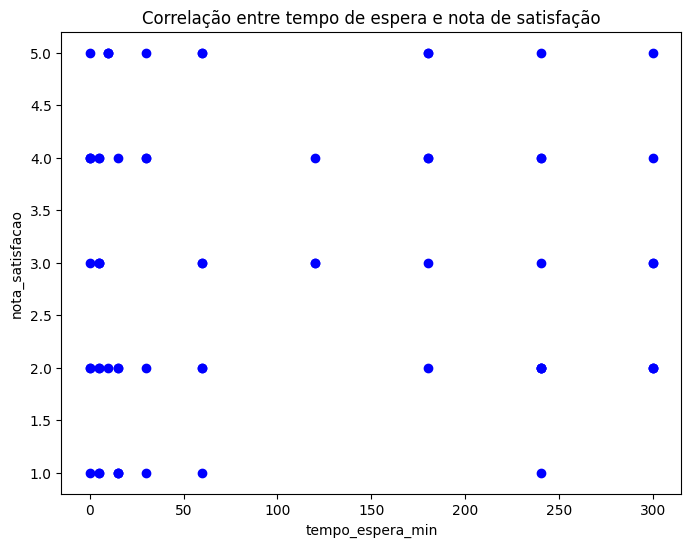

In [47]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(tempo_espera_satisfacao['tempo_espera_min'], tempo_espera_satisfacao['nota_satisfacao'], color='blue')
plt.title('Correlação entre tempo de espera e nota de satisfação')
plt.xlabel('tempo_espera_min')
plt.ylabel('nota_satisfacao')